In [77]:
import pandas as pd

In [78]:
data=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/GDP_Country.csv')

In [79]:
data.head(2)

,Country,Region,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [80]:
data=data.set_index(['Country','Region'])

In [81]:
data.head(2)

,,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,Region,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [82]:
# missing value imputation 
data.isnull().sum()/len(data)*100

Population                            0.000000
Area_sqm                              0.000000
Pop_Density_per sqm                   0.000000
Coastline (coast/area ratio)          0.000000
Net migration                         1.321586
Infant mortality (per 1000 births)    1.321586
GDP ($ per capita)                    0.440529
Literacy (%)                          7.929515
Phones (per 1000)                     1.762115
Arable (%)                            0.881057
Crops (%)                             0.881057
Other (%)                             0.881057
Climate                               9.691630
Birthrate                             1.321586
Deathrate                             1.762115
Agriculture                           6.607930
Industry                              7.048458
Service                               6.607930
dtype: float64

In [83]:
from sklearn.impute import KNNImputer

In [84]:
fill_mod=KNNImputer(n_neighbors=3)
data_fill=fill_mod.fit_transform(data)

In [85]:
data_fill=pd.DataFrame(data_fill)

In [86]:
data_fill=pd.DataFrame(data_fill)
data_fill.columns=data.columns
data_fill.index=data.index

In [87]:
data_fill.isnull().sum()

Population                            0
Area_sqm                              0
Pop_Density_per sqm                   0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [88]:
!pip install missingpy

In [89]:
from missingpy import KNNImputer

In [90]:
fill_mod1=KNNImputer()
data_fill1=fill_mod.fit_transform(data)

In [91]:
# Model Building
out=data_fill['GDP ($ per capita)']
inp=data_fill.drop('GDP ($ per capita)',axis=1)

In [92]:
import statsmodels.api as sm

In [93]:
# Checking Linear Regression Assumptions 
# VIF

In [94]:
inp_c=sm.add_constant(inp)
ols=sm.OLS(out,inp_c)
modv1=ols.fit()
modv1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     38.33
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           9.91e-55
Time:                        11:04:21   Log-Likelihood:                -2252.4
No. Observations:                 227   AIC:                             4541.
Df Residuals:                     209   BIC:                             4602.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               6.866e+06   4.38e+06      1.568      0.118   -1.76e+06    1.55e+07
Population                         -2.141e-06   3.49e-06     -0.614      0.540   -9.02e-06    4.73e-06
Area_sqm                            6.223e-05      0.000      0.271      0.786      -0.000       0.001
Pop_Density_per sqm                   -0.2643      0.231     -1.143      0.255      -0.720       0.192
Coastline (coast/area ratio)          -1.2588      5.508     -0.229      0.819     -12.117       9.599
Net migration                        408.4657     78.229      5.221      0.000     254.246     562.685
Infant mortality (per 1000 births)   -41.5199     28.186     -1.473      0.142     -97.086      14.046
Literacy (%)                          -5.4163     30.400     -0.178      0.859     -65.346      54.514
Phones (per 1000)                     30.6874      2.651     11.575      0.000      25.461      35.914
Arable (%)                         -6.857e+04   4.38e+04     -1.567      0.119   -1.55e+05    1.77e+04
Crops (%)                          -6.857e+04   4.38e+04     -1.567      0.119   -1.55e+05    1.77e+04
Other (%)                          -6.855e+04   4.38e+04     -1.566      0.119   -1.55e+05    1.77e+04
Climate                             -150.4137    647.173     -0.232      0.816   -1426.238    1125.411
Birthrate                            -56.2401     77.103     -0.729      0.467    -208.240      95.760
Deathrate                            186.5139    109.269      1.707      0.089     -28.898     401.925
Agriculture                        -8331.3607   1.49e+04     -0.561      0.576   -3.76e+04     2.1e+04
Industry                           -1660.1731   1.45e+04     -0.114      0.909   -3.03e+04     2.7e+04
Service                            -6957.7759   1.46e+04     -0.477      0.634   -3.57e+04    2.18e+04
==============================================================================
Omnibus:                       80.157   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.363
Skew:                           1.123   Prob(JB):                    2.67e-141
Kurtosis:                      10.962   Cond. No.                     1.55e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
#VIF= 1 /(1-R2) ---- R2=1, VIF = inf,,,, R2=0-----> 1    vif =5,,,R2=? (0.8)

In [97]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['feature']=inp.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
10,1294.273280,Other (%)
16,656.101432,Service
15,170.954685,Industry
14,79.687371,Agriculture
8,69.694365,Arable (%)
6,57.904914,Literacy (%)
12,30.249978,Birthrate
9,19.791211,Crops (%)
11,18.286506,Climate
5,16.583538,Infant mortality (per 1000 births)


In [98]:
inpv2=inp.drop(['Other (%)','Service'],axis=1)

In [99]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv2.values,i) for i in range(inpv2.shape[1])]
vif['feature']=inpv2.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
6,23.599869,Literacy (%)
11,17.615361,Birthrate
10,17.034965,Climate
5,16.575816,Infant mortality (per 1000 births)
12,11.199881,Deathrate
14,7.132471,Industry
13,6.035215,Agriculture
7,5.748963,Phones (per 1000)
8,2.840357,Arable (%)
9,1.959008,Crops (%)


In [100]:
inpv3=inpv2.drop(['Literacy (%)','Birthrate'],axis=1)

In [101]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv3.values,i) for i in range(inpv3.shape[1])]
vif['feature']=inpv3.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
9,13.109743,Climate
10,10.800072,Deathrate
5,9.840250,Infant mortality (per 1000 births)
11,5.329144,Agriculture
12,4.818570,Industry
6,4.716214,Phones (per 1000)
7,2.817897,Arable (%)
8,1.737765,Crops (%)
1,1.582195,Area_sqm
0,1.509854,Population


In [102]:
inpv4=inpv3.drop(['Climate','Deathrate','Infant mortality (per 1000 births)'],axis=1)

In [103]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv4.values,i) for i in range(inpv4.shape[1])]
vif['feature']=inpv4.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
9,2.536642,Industry
6,2.337912,Arable (%)
5,2.323582,Phones (per 1000)
8,1.699298,Agriculture
7,1.635228,Crops (%)
1,1.544150,Area_sqm
0,1.472409,Population
3,1.438497,Coastline (coast/area ratio)
2,1.245852,Pop_Density_per sqm
4,1.190953,Net migration


In [104]:
inp_c=sm.add_constant(inpv4)
ols4=sm.OLS(out,inp_c)
modv4=ols4.fit()
modv4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     63.58
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           8.58e-59
Time:                        11:04:26   Log-Likelihood:                -2257.3
No. Observations:                 227   AIC:                             4537.
Df Residuals:                     216   BIC:                             4574.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1847.4067   1683.065      1.098      0.274   -1469.928    5164.741
Population                   -2.831e-06   3.44e-06     -0.823      0.412   -9.61e-06    3.95e-06
Area_sqm                      9.513e-05      0.000      0.420      0.675      -0.000       0.001
Pop_Density_per sqm             -0.2858      0.225     -1.269      0.206      -0.730       0.158
Coastline (coast/area ratio)    -1.7133      5.504     -0.311      0.756     -12.562       9.135
Net migration                  371.9207     76.867      4.838      0.000     220.415     523.426
Phones (per 1000)               33.5116      2.249     14.899      0.000      29.078      37.945
Arable (%)                      -6.2733     28.354     -0.221      0.825     -62.160      49.613
Crops (%)                      -39.1464     47.309     -0.827      0.409    -132.393      54.100
Agriculture                  -6382.6953   3476.537     -1.836      0.068   -1.32e+04     469.586
Industry                      4716.4711   3093.491      1.525      0.129   -1380.823    1.08e+04
==============================================================================
Omnibus:                       76.556   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.357
Skew:                           1.074   Prob(JB):                    1.74e-128
Kurtosis:                      10.589   Cond. No.                     1.53e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
# Linearity
from matplotlib import pyplot as plt
import seaborn as sb

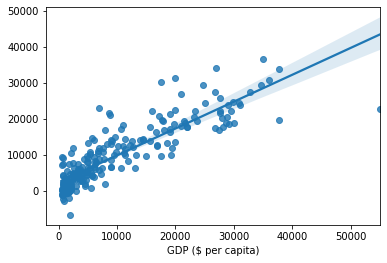

In [106]:
sb.regplot(out,modv4.predict())

In [107]:
from statsmodels.stats.diagnostic import linear_rainbow

In [108]:
linear_rainbow(res=modv4,frac=0.5)

(0.6662531991403061, 0.982407680496787)

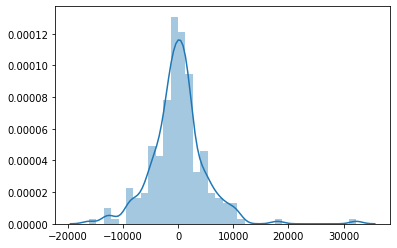

In [109]:
# normality test
sb.distplot(modv4.resid)

In [110]:
import scipy.stats as stats
stats.shapiro(modv4.resid)

(0.9156709313392639, 4.698257893842595e-10)

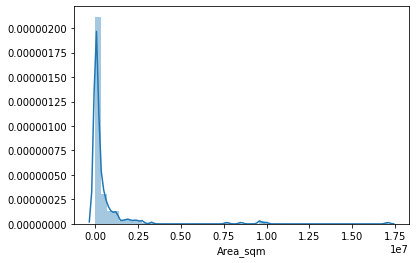

In [111]:
sb.distplot(inpv4.iloc[:,1])

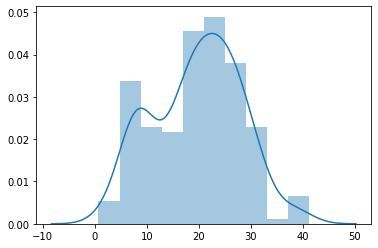

In [112]:
from scipy.special import boxcox, inv_boxcox
inp_norm,lam=stats.boxcox(inpv4.iloc[:,1])
inporg=inv_boxcox(inp_norm, lam)
sb.distplot(inp_norm)

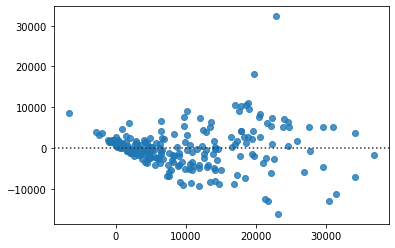

In [113]:
# Homoscadacity - test of variance
sb.residplot(modv4.predict(),modv4.resid)


In [114]:
import numpy as np
out_norm=np.log(out)

In [115]:
inp_c=sm.add_constant(inpv4)
ols5=sm.OLS(out_norm,inp_c)
modv5=ols5.fit()
#modv5.summary()

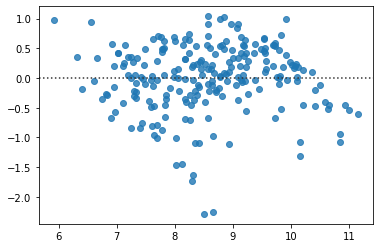

In [116]:
sb.residplot(modv5.predict(),modv5.resid)

In [117]:
inpv4.columns

Index(['Population', 'Area_sqm', 'Pop_Density_per sqm',
       'Coastline (coast/area ratio)', 'Net migration', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Agriculture', 'Industry'],
      dtype='object')

In [118]:
modv5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     72.96
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           1.23e-63
Time:                        11:04:33   Log-Likelihood:                -194.83
No. Observations:                 227   AIC:                             411.7
Df Residuals:                     216   BIC:                             449.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            8.1544      0.191     42.780      0.000       7.779       8.530
Population                   -1.554e-10    3.9e-10     -0.399      0.690   -9.24e-10    6.13e-10
Area_sqm                      4.606e-09   2.56e-08      0.180      0.858   -4.59e-08    5.51e-08
Pop_Density_per sqm          -3.359e-05   2.55e-05     -1.317      0.189   -8.39e-05    1.67e-05
Coastline (coast/area ratio)     0.0002      0.001      0.347      0.729      -0.001       0.001
Net migration                    0.0094      0.009      1.085      0.279      -0.008       0.027
Phones (per 1000)                0.0032      0.000     12.653      0.000       0.003       0.004
Arable (%)                      -0.0004      0.003     -0.129      0.898      -0.007       0.006
Crops (%)                       -0.0108      0.005     -2.024      0.044      -0.021      -0.000
Agriculture                     -2.9097      0.394     -7.390      0.000      -3.686      -2.134
Industry                         0.5423      0.350      1.548      0.123      -0.148       1.233
==============================================================================
Omnibus:                       40.225   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.757
Skew:                          -0.989   Prob(JB):                     1.43e-14
Kurtosis:                       4.681   Cond. No.                     1.53e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
inpv5=inpv4.copy()

In [120]:
while(len(inpv5.columns)>0):
    inp_c=sm.add_constant(inpv5)
    ols=sm.OLS(out,inp_c)
    mod=ols.fit()
    f=mod.pvalues[1:].idxmax()
    if mod.pvalues[1:].max()>0.05:
        inpv5=inpv5.drop(f,axis=1)
    else:
        break
print('The final features : ',inpv5.columns)

The final features :  Index(['Net migration', 'Phones (per 1000)', 'Industry'], dtype='object')


In [121]:
inp_c=sm.add_constant(inpv5)
ols6=sm.OLS(out,inp_c)
modv6=ols6.fit()
modv6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           1.37e-64
Time:                        11:04:35   Log-Likelihood:                -2261.0
No. Observations:                 227   AIC:                             4530.
Df Residuals:                     223   BIC:                             4544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1050.5996    919.423     -1.143      0.254   -2862.468     761.269
Net migration       387.7167     72.340      5.360      0.000     245.160     530.274
Phones (per 1000)    35.8024      1.586     22.572      0.000      32.677      38.928
Industry           8269.2531   2566.077      3.223      0.001    3212.391    1.33e+04
==============================================================================
Omnibus:                       77.996   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              658.238
Skew:                           1.067   Prob(JB):                    1.16e-143
Kurtosis:                      11.065   Cond. No.                     2.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
inpv4.columns

Index(['Population', 'Area_sqm', 'Pop_Density_per sqm',
       'Coastline (coast/area ratio)', 'Net migration', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Agriculture', 'Industry'],
      dtype='object')

In [123]:
from sklearn.preprocessing import PolynomialFeatures

In [124]:
pf=PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)
inpv6=pf.fit_transform(inpv4)

In [125]:
#x1,x2,x3 ==> x1^2 , x2^2 , x3^2 x1*x2 ,x2*x3 , x3*x1 ,cons

In [126]:
inpv6=pd.DataFrame(inpv6)
inpv6.columns=pf.get_feature_names()
inpv6.index=inpv4.index

In [127]:
inpv6.head()

,,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x5 x6,x5 x7,x5 x8,x5 x9,x6 x7,x6 x8,x6 x9,x7 x8,x7 x9,x8 x9
Country,Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,3.2,12.13,0.22,0.380000,0.240000,...,38.816,0.704,1.2160,0.7680,2.6686,4.609400,2.911200,0.08360,0.05280,0.091200
Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,71.2,21.09,4.42,0.232000,0.188000,...,1501.608,314.704,16.5184,13.3856,93.2178,4.892880,3.964920,1.02544,0.83096,0.043616
Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,78.1,3.22,0.25,0.101000,0.600000,...,251.482,19.525,7.8881,46.8600,0.8050,0.325220,1.932000,0.02525,0.15000,0.060600
American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.71,259.5,10.00,15.00,0.177333,0.232333,...,2595.000,3892.500,46.0180,60.2905,150.0000,1.773333,2.323333,2.66000,3.48500,0.041200
Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.60,497.2,2.22,0.00,0.026000,0.150000,...,1103.784,0.000,12.9272,74.5800,0.0000,0.057720,0.333000,0.00000,0.00000,0.003900


In [128]:
inpv4.head()

,,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Phones (per 1000),Arable (%),Crops (%),Agriculture,Industry
Country,Region,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,3.2,12.13,0.22,0.380000,0.240000
Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,71.2,21.09,4.42,0.232000,0.188000
Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,78.1,3.22,0.25,0.101000,0.600000
American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.71,259.5,10.00,15.00,0.177333,0.232333
Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.60,497.2,2.22,0.00,0.026000,0.150000


In [129]:
inp_c=sm.add_constant(inpv6)
ols7=sm.OLS(out,inp_c)
modv7=ols7.fit()
#modv7.summary()

In [130]:
inpv6.head()

,,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x5 x6,x5 x7,x5 x8,x5 x9,x6 x7,x6 x8,x6 x9,x7 x8,x7 x9,x8 x9
Country,Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,3.2,12.13,0.22,0.380000,0.240000,...,38.816,0.704,1.2160,0.7680,2.6686,4.609400,2.911200,0.08360,0.05280,0.091200
Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,71.2,21.09,4.42,0.232000,0.188000,...,1501.608,314.704,16.5184,13.3856,93.2178,4.892880,3.964920,1.02544,0.83096,0.043616
Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,78.1,3.22,0.25,0.101000,0.600000,...,251.482,19.525,7.8881,46.8600,0.8050,0.325220,1.932000,0.02525,0.15000,0.060600
American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.71,259.5,10.00,15.00,0.177333,0.232333,...,2595.000,3892.500,46.0180,60.2905,150.0000,1.773333,2.323333,2.66000,3.48500,0.041200
Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.60,497.2,2.22,0.00,0.026000,0.150000,...,1103.784,0.000,12.9272,74.5800,0.0000,0.057720,0.333000,0.00000,0.00000,0.003900


In [131]:
inpv7=inpv6.copy()

In [132]:
while(len(inpv7.columns)>0):
    inp_c=sm.add_constant(inpv7)
    ols=sm.OLS(out,inp_c)
    mod=ols.fit()
    f=mod.pvalues[1:].idxmax()
    if mod.pvalues[1:].max()>0.05:
        inpv7=inpv7.drop(f,axis=1)
    else:
        break
print('The final features : ',inpv7.columns)

The final features :  Index(['x5', 'x1 x3', 'x1 x4', 'x2 x4', 'x2 x9', 'x3 x5', 'x4 x5', 'x4 x6',
       'x4 x7', 'x5 x7', 'x5 x8', 'x5 x9', 'x8 x9'],
      dtype='object')


In [133]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv7.values,i) for i in range(inpv7.shape[1])]
vif['feature']=inpv7.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
0,10.047153,x5
4,7.131499,x2 x9
11,6.931507,x5 x9
3,6.843627,x2 x4
10,2.758576,x5 x8
5,2.469433,x3 x5
6,2.267602,x4 x5
2,2.166020,x1 x4
1,2.156369,x1 x3
9,1.876909,x5 x7


In [134]:
inp_c=sm.add_constant(inpv7)
ols8=sm.OLS(out,inp_c)
modv8=ols8.fit()
modv8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     78.79
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           8.70e-74
Time:                        11:10:52   Log-Likelihood:                -2213.4
No. Observations:                 227   AIC:                             4455.
Df Residuals:                     213   BIC:                             4503.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3268.9256    851.616      3.838      0.000    1590.251    4947.600
x5            29.8339      3.068      9.725      0.000      23.787      35.881
x1 x3          0.0008      0.000      2.784      0.006       0.000       0.001
x1 x4         -0.0002    7.8e-05     -2.369      0.019      -0.000    -3.1e-05
x2 x4          0.1782      0.066      2.703      0.007       0.048       0.308
x2 x9         -6.3164      2.859     -2.209      0.028     -11.951      -0.681
x3 x5         -0.0495      0.018     -2.810      0.005      -0.084      -0.015
x4 x5          0.7431      0.222      3.348      0.001       0.306       1.181
x4 x6         26.4436      6.852      3.859      0.000      12.938      39.950
x4 x7        -16.3663      4.567     -3.584      0.000     -25.368      -7.364
x5 x7         -0.5979      0.236     -2.532      0.012      -1.063      -0.132
x5 x8        -78.5546     18.904     -4.155      0.000    -115.818     -41.291
x5 x9         35.9632      9.075      3.963      0.000      18.075      53.851
x8 x9      -2.805e+04   1.32e+04     -2.119      0.035   -5.41e+04   -1960.732
==============================================================================
Omnibus:                       80.520   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.594
Skew:                           1.237   Prob(JB):                    9.75e-106
Kurtosis:                       9.708   Cond. No.                     2.58e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
err=modv8.resid
mse=np.mean(err**2)
rmse=np.sqrt(mse)
rmse

4153.0513696906455

In [139]:
data['GDP ($ per capita)'].min()

500.0

In [ ]:
# mod 1 to predict age --> 42 (rmse)
# mod 2 to predict CTC salary ---> 8500 (rmse)

In [140]:
# Regularization

#(yact - ypred)^2
#(yact - b0+b1*x1+b2*x2)^2

#part_diff((yact - b0+b1*x1+b2*x2)^2) = 0

#(yact - ypred)^2 + lamda*(sum(Slopes))   slopes^2 for ridge, slopes for lasso
#(yact - ypred)^2 + lamda*(b1+b2))

In [ ]:
g2,g3,g4,g5 - train, g1-test  --- acc for fold 1
g1,g3,g4,g5 - train, g2-test ---- acc for fold2
g1,g2,g4,g5 - train, g3-test  --- acc for fold 3
g1,g2,g3,g5 - train, g4-test ---- acc for fold4
g1,g2,g3,g4 - train, g5-test ---- acc for fold5 

In [154]:
inpv6.shape

(227, 55)

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
mod_lr=LinearRegression()
#res=cross_val_score(mod_lr,inpv7,out,cv=3,scoring='neg_mean_squared_error')
res=cross_val_score(mod_lr,inpv6,out,cv=3,scoring='neg_mean_squared_error')
rmse=np.sqrt(abs(res))
print(rmse.mean())
print(rmse.std())


30261.081346615505
18937.10265015255


In [155]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
mod_rid=Ridge(alpha=1,normalize=True)
#res=cross_val_score(mod_rid,inpv7,out,cv=3,scoring='neg_mean_squared_error')
res=cross_val_score(mod_rid,inpv6,out,cv=3,scoring='neg_mean_squared_error')
rmse=np.sqrt(abs(res))
print(rmse.mean())
print(rmse.std())

6271.52245805962
1679.1019931629503


In [157]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
mod_las=Lasso(alpha=1,normalize=True)
#res=cross_val_score(mod_rid,inpv7,out,cv=3,scoring='neg_mean_squared_error')
res=cross_val_score(mod_las,inpv6,out,cv=3,scoring='neg_mean_squared_error')
rmse=np.sqrt(abs(res))
print(rmse.mean())
print(rmse.std())

13085.914123671186
7268.669679406605


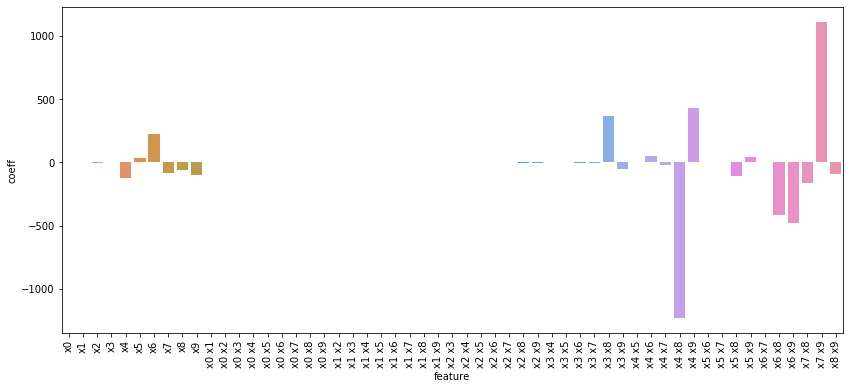

In [168]:
from sklearn.linear_model import LinearRegression
mod_lr=LinearRegression()
mod_lr.fit(inpv6,out)
coef=mod_lr.coef_
coef1=pd.DataFrame(coef)
col=inpv6.columns
coef1['feature']=col
coef1.columns=['coeff','feature']
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sb.barplot(coef1['feature'],coef1['coeff'])

,coeff,feature
0,-2.627769e-07,x0
1,-2.079010e-05,x1
2,8.900476e-02,x2
3,-9.437798e-01,x3
4,9.020921e+01,x4
5,8.494301e+00,x5
6,-4.771530e-01,x6
7,-3.449767e+01,x7
8,-5.629411e+03,x8
9,-1.277211e+03,x9


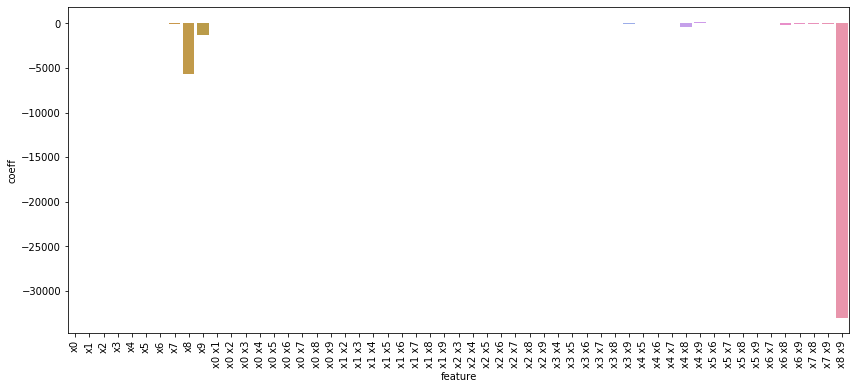

In [171]:
from sklearn.linear_model import Ridge
mod_rid=Ridge(normalize=True)
mod_rid.fit(inpv6,out)
coef=mod_rid.coef_
coef1=pd.DataFrame(coef)
col=inpv6.columns
coef1['feature']=col
coef1.columns=['coeff','feature']
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sb.barplot(coef1['feature'],coef1['coeff'])
coef1

,coeff,feature
0,-0.000000e+00,x0
1,-0.000000e+00,x1
2,0.000000e+00,x2
3,-0.000000e+00,x3
4,-0.000000e+00,x4
5,2.863455e+01,x5
6,3.269910e+01,x6
7,-8.719946e+01,x7
8,-0.000000e+00,x8
9,2.557195e+02,x9


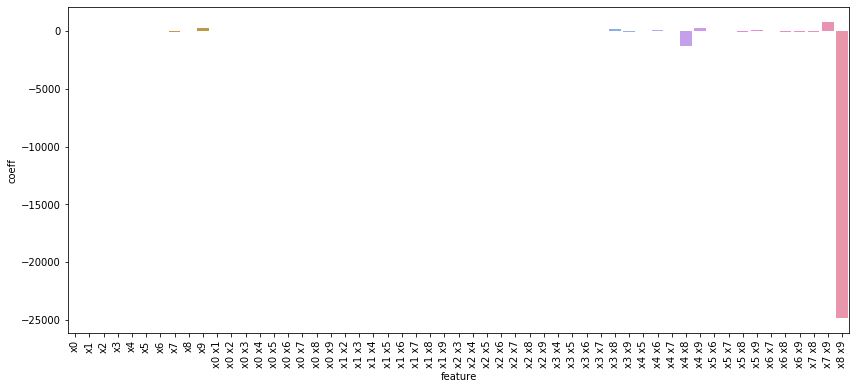

In [172]:
from sklearn.linear_model import Lasso
mod_las=Lasso(normalize=True)
mod_las.fit(inpv6,out)
coef=mod_las.coef_
coef1=pd.DataFrame(coef)
col=inpv6.columns
coef1['feature']=col
coef1.columns=['coeff','feature']
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sb.barplot(coef1['feature'],coef1['coeff'])
coef1

In [173]:
data=pd.read_excel('delivery.xlsx')
data.head()

,Trip,Region,Parcels,TruckAge,Minutes
0,1,B,46,11,461.9
1,2,B,32,1,273.1
2,3,C,42,14,489.4
3,4,B,30,13,303.0
4,5,B,36,15,367.7


In [174]:
data=pd.get_dummies(data,drop_first=True)

In [ ]:
B -  1 0
C -  0 1
A -  0 0

In [175]:
data.head()

,Trip,Parcels,TruckAge,Minutes,Region_B,Region_C
0,1,46,11,461.9,1,0
1,2,32,1,273.1,1,0
2,3,42,14,489.4,0,1
3,4,30,13,303.0,1,0
4,5,36,15,367.7,1,0


In [176]:
out=data['Minutes']
inp=data.drop(['Trip','Minutes'],axis=1)

In [177]:
inp_c=sm.add_constant(inp)
ols=sm.OLS(out,inp_c)
modv=ols.fit()
modv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutes   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           5.68e-27
Time:                        12:52:56   Log-Likelihood:                -209.96
No. Observations:                  47   AIC:                             429.9
Df Residuals:                      42   BIC:                             439.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.9558     17.852      4.087      0.000      36.929     108.982
Parcels        9.9249      0.402     24.716      0.000       9.115      10.735
TruckAge       3.6838      0.759      4.851      0.000       2.151       5.216
Region_B    -106.4985      8.173    -13.031      0.000    -122.991     -90.006
Region_C    -107.7127      8.079    -13.333      0.000    -124.017     -91.409
==============================================================================
Omnibus:                       44.045   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.117
Skew:                           2.420   Prob(JB):                     1.15e-37
Kurtosis:                      10.965   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
# Time taken for REgion B is 106 minutes less than Region A
# Time taken for REgion C is 107 minutes less than Region A